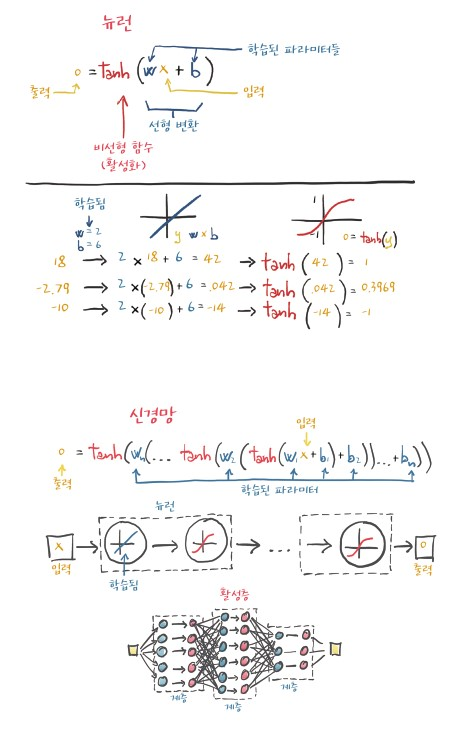

In [1]:
from IPython import display
display.Image('C:/Users/user/Desktop/HH/img/72.jpg', width = 700, height = 1000)

In [2]:
import torch
import numpy as np

In [3]:
# torch.nn 신경망 전용 서브 모델
# forward 대신에 __call__ 사용하기

In [4]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

print(t_u.shape)

n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

print(train_indices, val_indices)

t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

torch.Size([11, 1])
tensor([ 4,  8,  9,  7, 10,  2,  6,  0,  5]) tensor([1, 3])


In [5]:
import torch.nn as nn
linear_model = nn.Linear(1,1)
linear_model(t_un_val)

tensor([[3.4515],
        [5.3356]], grad_fn=<AddmmBackward0>)

In [6]:
class Test:
    def __init__(self):
        pass
    def __call__(self,str):
        return f'called data is {str}'
    
temp = Test()

In [7]:
temp('hello')

'called data is hello'

In [8]:
linear_model.weight

Parameter containing:
tensor([[0.7246]], requires_grad=True)

In [9]:
linear_model.bias

Parameter containing:
tensor([-0.5992], requires_grad=True)

In [10]:
x = torch.ones(1)
linear_model(x)

tensor([0.1254], grad_fn=<AddBackward0>)

In [11]:
x = torch.ones(10,1)
linear_model(x)

tensor([[0.1254],
        [0.1254],
        [0.1254],
        [0.1254],
        [0.1254],
        [0.1254],
        [0.1254],
        [0.1254],
        [0.1254],
        [0.1254]], grad_fn=<AddmmBackward0>)

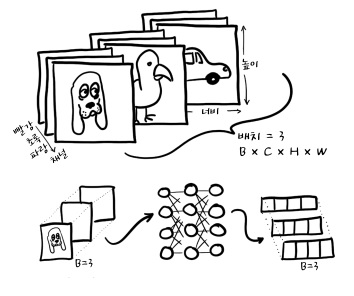

In [12]:
display.Image('C:/Users/user/Desktop/HH/img/73.jpg', width = 700, height = 1000)

In [13]:
# GPU가 병렬 연산에 최적화 되어 있기 때문에 배치형태로 만들어야 효율적임

In [14]:
linear_model = nn.Linear(1,1)
optimizer = torch.optim.SGD(linear_model.parameters(), lr = 1e-2)

In [15]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.5647]], requires_grad=True),
 Parameter containing:
 tensor([-0.7907], requires_grad=True)]

In [16]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs+1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        
        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        print(f"epoch : {epoch} training loss : {loss_train.item():.4f} validation loss : {loss_val.item():.4f}")

In [17]:
linear_model = nn.Linear(1,1)
optimizer = torch.optim.SGD(linear_model.parameters(), lr=1e-4)
training_loop(n_epochs=3000, optimizer=optimizer, model=linear_model
              , loss_fn = nn.MSELoss()
              , t_u_train=t_u_train
              , t_u_val=t_u_val
              , t_c_train=t_c_train
              , t_c_val=t_c_val)

epoch : 1 training loss : 530.6130 validation loss : 543.3320
epoch : 2 training loss : 151.3352 validation loss : 63.4355
epoch : 3 training loss : 56.7229 validation loss : 10.0356
epoch : 4 training loss : 33.1211 validation loss : 29.8332
epoch : 5 training loss : 27.2330 validation loss : 51.3118
epoch : 6 training loss : 25.7637 validation loss : 64.9299
epoch : 7 training loss : 25.3966 validation loss : 72.4517
epoch : 8 training loss : 25.3045 validation loss : 76.3875
epoch : 9 training loss : 25.2810 validation loss : 78.3970
epoch : 10 training loss : 25.2746 validation loss : 79.4110
epoch : 11 training loss : 25.2725 validation loss : 79.9192
epoch : 12 training loss : 25.2714 validation loss : 80.1728
epoch : 13 training loss : 25.2706 validation loss : 80.2986
epoch : 14 training loss : 25.2699 validation loss : 80.3606
epoch : 15 training loss : 25.2692 validation loss : 80.3905
epoch : 16 training loss : 25.2685 validation loss : 80.4045
epoch : 17 training loss : 25.

epoch : 469 training loss : 24.9506 validation loss : 79.5524
epoch : 470 training loss : 24.9499 validation loss : 79.5505
epoch : 471 training loss : 24.9492 validation loss : 79.5486
epoch : 472 training loss : 24.9485 validation loss : 79.5467
epoch : 473 training loss : 24.9478 validation loss : 79.5448
epoch : 474 training loss : 24.9471 validation loss : 79.5428
epoch : 475 training loss : 24.9464 validation loss : 79.5409
epoch : 476 training loss : 24.9457 validation loss : 79.5391
epoch : 477 training loss : 24.9450 validation loss : 79.5372
epoch : 478 training loss : 24.9443 validation loss : 79.5352
epoch : 479 training loss : 24.9436 validation loss : 79.5333
epoch : 480 training loss : 24.9429 validation loss : 79.5314
epoch : 481 training loss : 24.9422 validation loss : 79.5295
epoch : 482 training loss : 24.9415 validation loss : 79.5276
epoch : 483 training loss : 24.9408 validation loss : 79.5257
epoch : 484 training loss : 24.9401 validation loss : 79.5238
epoch : 

epoch : 949 training loss : 24.6186 validation loss : 78.6445
epoch : 950 training loss : 24.6179 validation loss : 78.6426
epoch : 951 training loss : 24.6172 validation loss : 78.6407
epoch : 952 training loss : 24.6165 validation loss : 78.6388
epoch : 953 training loss : 24.6158 validation loss : 78.6370
epoch : 954 training loss : 24.6152 validation loss : 78.6351
epoch : 955 training loss : 24.6145 validation loss : 78.6332
epoch : 956 training loss : 24.6138 validation loss : 78.6313
epoch : 957 training loss : 24.6131 validation loss : 78.6295
epoch : 958 training loss : 24.6124 validation loss : 78.6276
epoch : 959 training loss : 24.6117 validation loss : 78.6257
epoch : 960 training loss : 24.6110 validation loss : 78.6238
epoch : 961 training loss : 24.6104 validation loss : 78.6219
epoch : 962 training loss : 24.6097 validation loss : 78.6201
epoch : 963 training loss : 24.6090 validation loss : 78.6182
epoch : 964 training loss : 24.6083 validation loss : 78.6163
epoch : 

epoch : 1410 training loss : 24.3045 validation loss : 77.7839
epoch : 1411 training loss : 24.3038 validation loss : 77.7821
epoch : 1412 training loss : 24.3031 validation loss : 77.7802
epoch : 1413 training loss : 24.3024 validation loss : 77.7784
epoch : 1414 training loss : 24.3018 validation loss : 77.7765
epoch : 1415 training loss : 24.3011 validation loss : 77.7746
epoch : 1416 training loss : 24.3004 validation loss : 77.7728
epoch : 1417 training loss : 24.2997 validation loss : 77.7709
epoch : 1418 training loss : 24.2991 validation loss : 77.7691
epoch : 1419 training loss : 24.2984 validation loss : 77.7672
epoch : 1420 training loss : 24.2977 validation loss : 77.7654
epoch : 1421 training loss : 24.2970 validation loss : 77.7635
epoch : 1422 training loss : 24.2964 validation loss : 77.7616
epoch : 1423 training loss : 24.2957 validation loss : 77.7598
epoch : 1424 training loss : 24.2950 validation loss : 77.7580
epoch : 1425 training loss : 24.2943 validation loss : 

epoch : 1918 training loss : 23.9636 validation loss : 76.8484
epoch : 1919 training loss : 23.9629 validation loss : 76.8465
epoch : 1920 training loss : 23.9623 validation loss : 76.8447
epoch : 1921 training loss : 23.9616 validation loss : 76.8428
epoch : 1922 training loss : 23.9609 validation loss : 76.8410
epoch : 1923 training loss : 23.9603 validation loss : 76.8392
epoch : 1924 training loss : 23.9596 validation loss : 76.8374
epoch : 1925 training loss : 23.9589 validation loss : 76.8355
epoch : 1926 training loss : 23.9583 validation loss : 76.8337
epoch : 1927 training loss : 23.9576 validation loss : 76.8319
epoch : 1928 training loss : 23.9569 validation loss : 76.8300
epoch : 1929 training loss : 23.9563 validation loss : 76.8282
epoch : 1930 training loss : 23.9556 validation loss : 76.8264
epoch : 1931 training loss : 23.9549 validation loss : 76.8246
epoch : 1932 training loss : 23.9543 validation loss : 76.8227
epoch : 1933 training loss : 23.9536 validation loss : 

epoch : 2357 training loss : 23.6734 validation loss : 76.0504
epoch : 2358 training loss : 23.6727 validation loss : 76.0486
epoch : 2359 training loss : 23.6721 validation loss : 76.0468
epoch : 2360 training loss : 23.6714 validation loss : 76.0450
epoch : 2361 training loss : 23.6708 validation loss : 76.0432
epoch : 2362 training loss : 23.6701 validation loss : 76.0414
epoch : 2363 training loss : 23.6695 validation loss : 76.0396
epoch : 2364 training loss : 23.6688 validation loss : 76.0378
epoch : 2365 training loss : 23.6681 validation loss : 76.0360
epoch : 2366 training loss : 23.6675 validation loss : 76.0342
epoch : 2367 training loss : 23.6668 validation loss : 76.0324
epoch : 2368 training loss : 23.6662 validation loss : 76.0306
epoch : 2369 training loss : 23.6655 validation loss : 76.0288
epoch : 2370 training loss : 23.6649 validation loss : 76.0269
epoch : 2371 training loss : 23.6642 validation loss : 76.0251
epoch : 2372 training loss : 23.6635 validation loss : 

epoch : 2795 training loss : 23.3878 validation loss : 75.2640
epoch : 2796 training loss : 23.3872 validation loss : 75.2622
epoch : 2797 training loss : 23.3865 validation loss : 75.2604
epoch : 2798 training loss : 23.3859 validation loss : 75.2587
epoch : 2799 training loss : 23.3852 validation loss : 75.2569
epoch : 2800 training loss : 23.3846 validation loss : 75.2551
epoch : 2801 training loss : 23.3840 validation loss : 75.2533
epoch : 2802 training loss : 23.3833 validation loss : 75.2515
epoch : 2803 training loss : 23.3827 validation loss : 75.2498
epoch : 2804 training loss : 23.3820 validation loss : 75.2480
epoch : 2805 training loss : 23.3814 validation loss : 75.2462
epoch : 2806 training loss : 23.3807 validation loss : 75.2444
epoch : 2807 training loss : 23.3801 validation loss : 75.2426
epoch : 2808 training loss : 23.3794 validation loss : 75.2408
epoch : 2809 training loss : 23.3788 validation loss : 75.2390
epoch : 2810 training loss : 23.3781 validation loss : 

In [18]:
linear_model.weight, linear_model.bias

(Parameter containing:
 tensor([[0.1977]], requires_grad=True),
 Parameter containing:
 tensor([-0.0532], requires_grad=True))